**M ARISH SC25M159**

**MA642 Advanced Machine Learning Lab**

**Assignment-I**

**1. Apply model-based clustering on Data 1**


In [45]:
# Data Processing
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
#from scipy.stats import multivariate_normal
#import seaborn as sns

# Clustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture


# Number of Cluster
from sklearn.metrics import silhouette_score

**Load Data**

In [46]:
# Load the CSV file
data1 = pd.read_csv("Data1.csv")
df = pd.DataFrame(data1)

# Display first few rows to check
print("Data 1 -", (data1.shape)) # prints number of rows and columns
print(type(data1))
print(data1.head())
data1.keys()

Data 1 - (1600, 3)
<class 'pandas.core.frame.DataFrame'>
   Unnamed: 0         0         1
0           0  1.004939  2.319887
1           1  3.412653 -1.637157
2           2  7.483318 -1.399250
3           3  0.702826  2.038150
4           4  0.287620  2.191703


Index(['Unnamed: 0', '0', '1'], dtype='object')

**(a) Report the number of clusters and the technique used to determine
the number of clusters.**

The elbow method is the most widely used method for choosing the number of clusters. It runs clustering models for a range of cluster numbers and plots the within cluster sum of squares. The elbow on the plot shows the point where the diminishing returns for additional clusters happen.

From the visualization, we can see that the biggest decrease in within cluster sum of squares happen at 4 clusters, and there is a relatively large decrease from 4 to 5 clusters. The decreases are small for the models with number of clusters greater then 4.

Therefore, we can conclude that the optimal number of clusters is probably 4

The Within cluster sum of squares for 1 cluster is 341348099.04
The Within cluster sum of squares for 2 cluster is 85350063.62
The Within cluster sum of squares for 3 cluster is 37947957.26
The Within cluster sum of squares for 4 cluster is 21358853.51
The Within cluster sum of squares for 5 cluster is 13672388.77
The Within cluster sum of squares for 6 cluster is 9535909.78
The Within cluster sum of squares for 7 cluster is 6990135.38
The Within cluster sum of squares for 8 cluster is 5388825.62
The Within cluster sum of squares for 9 cluster is 4243476.10
The Within cluster sum of squares for 10 cluster is 3434590.63


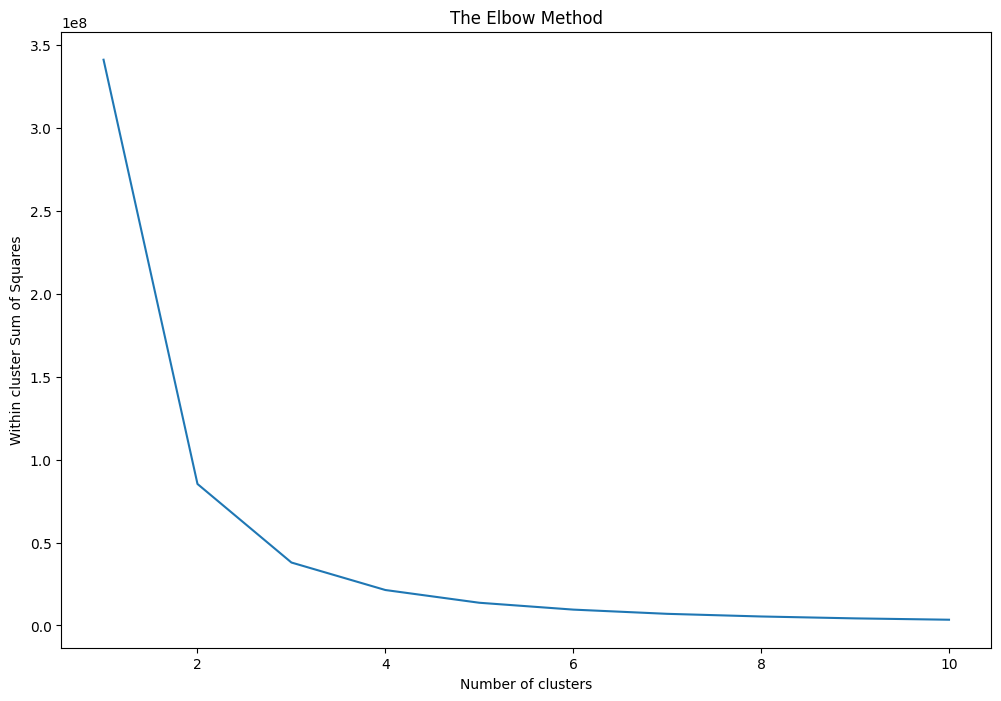

In [47]:
# Elbow Method
# Create an empty dictionary to save the within cluster sum of square values
wcss = {}

# Look through the number of clusters
for k in range(1, 11):
  # Run k-Means Model
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(data1)

  # Sum of squared distances of samples to their closest cluster center
  wcss[k] = (kmeans.inertia_)

  # Print the within cluster sum of square for each number
  print(f'The Within cluster sum of squares for {k} cluster is {wcss[k]:.2f}')

  # Save the within cluster sum of square values
  wcss[k] = kmeans.inertia_

# Visulization
plt.figure(figsize=(12, 8))
plt.plot(list(wcss.keys()),list(wcss.values()))
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster Sum of Squares')
plt.title('The Elbow Method')
plt.show()

The silhouette score measures how similar a data point is to its own cluster compared to the closest neighbor cluster. The silhouette ranges from -1 to +1.



*   The best value is 1, and a value close to 1 means that the sample's distance to the nearest neighbor cluster is much larger than the Intra-cluster distance.


*   O indicate overlapping clusters.

*   The worst value is -1, and a value close to -1 means that the sample is assigned to the wrong cluster.

Note that Silhouette Coefficient is only defined if the number of clusters is at least 2 and at most the number of samples
minus 1.

The Silhouette score of the model is the average Silhouette value of all samples.

From the visualization, we can see that the model with 4 clusters has the highest value of Silhouette score, and the model with 3 clusters has the 2nd highest value, so we get the consistent result that there are 4 clusters.

The Silhouette Score for 2 cluster is 0.626
The Silhouette Score for 3 cluster is 0.589
The Silhouette Score for 4 cluster is 0.570
The Silhouette Score for 5 cluster is 0.559
The Silhouette Score for 6 cluster is 0.551
The Silhouette Score for 7 cluster is 0.545
The Silhouette Score for 8 cluster is 0.540
The Silhouette Score for 9 cluster is 0.536
The Silhouette Score for 10 cluster is 0.533


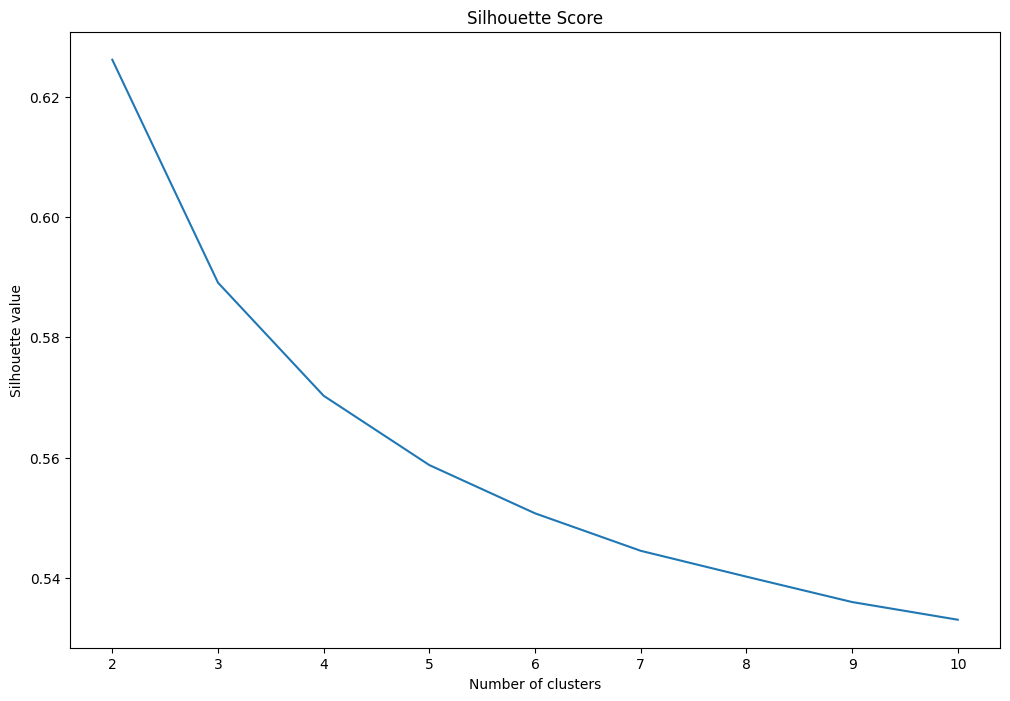

In [48]:
# Silhouette Method
# Create an empty dictionary for the Silhouette Method
s_score = {}

# Look through the number of clusters
for k in range(2, 11):
  # Run k-Means Model
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(data1)

  # make prediction
  classes = kmeans.predict(data1)

  # Calculate the Silhouette Score
  s_score[k] = (silhouette_score(data1,classes))

  # Print the Silhouette Score for each cluster number
  print(f'The Silhouette Score for {k} cluster is {s_score[k]:.3f}')

# Visulization
plt.figure(figsize=(12, 8))
plt.plot(list(s_score.keys()),list(s_score.values()))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette value')
plt.title('Silhouette Score')
plt.show()

**(b) Plot the clusters.**

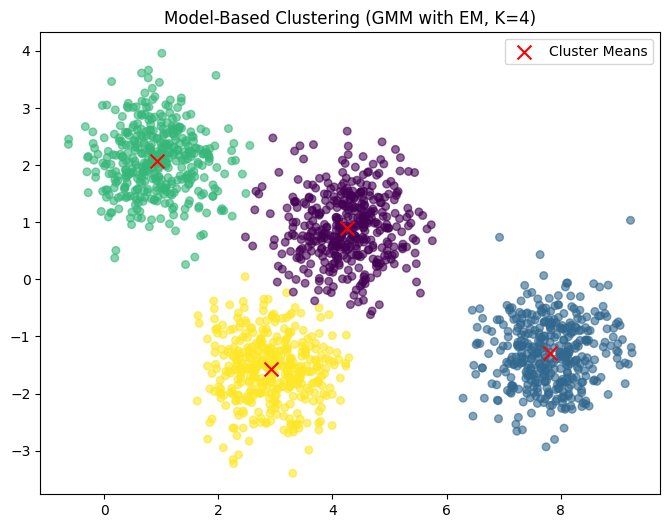

In [49]:
# Fit GMM with K
K=4
data1 = df.iloc[:, 1:].values
gmm = GaussianMixture(n_components=K, covariance_type='full', random_state=42)
gmm.fit(data1)

# Predict cluster labels
labels = gmm.predict(data1)

plt.figure(figsize=(8,6))
plt.scatter(data1[:,0], data1[:,1], c=labels, cmap='viridis', s=30, alpha=0.6)
plt.scatter(gmm.means_[:,0], gmm.means_[:,1], c='red', marker='x', s=100, label='Cluster Means')
plt.title("Model-Based Clustering (GMM with EM, K=4)")
plt.legend()
plt.show()


**(c) Report the mean, covariance matrix, and prior probability corre
sponding to each cluster.**

- Mean (gmm.means_) → the center of each Gaussian cluster in feature space.

- Covariance Matrix (gmm.covariances_) → describes the spread and orientation of the cluster (elliptical shape).

- Prior Probability (gmm.weights_) → the proportion of points assigned to each cluster (sums to 1).


In [50]:
# Report parameters
for i in range(K):
    print(f"\nCluster {i+1}:")
    print("Mean:", gmm.means_[i])
    print("Covariance Matrix:\n", gmm.covariances_[i])
    print("Prior Probability:", gmm.weights_[i])


Cluster 1:
Mean: [4.26291947 0.90480611]
Covariance Matrix:
 [[0.36402472 0.01260967]
 [0.01260967 0.3570133 ]]
Prior Probability: 0.2517800618287088

Cluster 2:
Mean: [ 7.80822697 -1.29807875]
Covariance Matrix:
 [[0.33174796 0.02485757]
 [0.02485757 0.3381861 ]]
Prior Probability: 0.2499375598839647

Cluster 3:
Mean: [0.92267076 2.07816401]
Covariance Matrix:
 [[ 0.33558043 -0.01354473]
 [-0.01354473  0.33917389]]
Prior Probability: 0.25055866904607427

Cluster 4:
Mean: [ 2.92027808 -1.57834654]
Covariance Matrix:
 [[ 0.32967974 -0.01101173]
 [-0.01101173  0.33696687]]
Prior Probability: 0.24772370924125217


**(d) Assess the quality of the clusters.**

**Silhouette Score**

Measures how similar each point is to its own cluster compared to other clusters.
- Range: -1 to 1
- Closer to 1 → well-separated clusters
- Around 0 → overlapping clusters
- Negative → points may be in the wrong cluster


In [51]:
# Assess quality
sil_score = silhouette_score(data1, labels)
print("\nSilhouette Score:", sil_score)


Silhouette Score: 0.6781539656347381
